In [ ]:
import os
import sys

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import cvxpy as cp

from google.colab import drive
drive.mount('/content/drive')

print("python \t {}".format(".".join(map(str, sys.version_info[:3]))))
print("numpy \t {}".format(np.__version__))
print("pandas \t {}".format(pd.__version__))
print("cvxpy \t {}".format(cp.__version__))
print("seaborn \t {}".format(sns.__version__))
print("matplotlib \t {}".format(matplotlib.__version__))
print("pandas-datareader {}".format(pdr.__version__))

Mounted at /content/drive
python 	 3.10.12
numpy 	 1.23.5
pandas 	 1.5.3
cvxpy 	 1.3.2
seaborn 	 0.12.2
matplotlib 	 3.7.1
pandas-datareader 0.10.0


In [ ]:
os.getcwd()

'/content'

# Data from Yahoo! Finance
<br>
<font size="+1">
    <ul>
        <li>We will use a Python package called <a href="https://pandas-datareader.readthedocs.io/en/latest/">Pandas Data Reader</a> to quickly scrape data from Yahoo! Finance.</li>
        <br>
        <li>Pandas Data Reader also has additional interesting functionality that is worth checking out.</li>
        <br>
    </ul>
</font>

In [ ]:
! pip install pandas-datareader

<br>
<font size="+1">
    <ul>
        <li>We will download daily OHLC (Open-High-Low-Close) variables for Microsoft, Visa, and Walmart.</li>
        <br>
        <ul>
            <font color="green"><li style="color:green">Try your own favorite tickers (if you want)!</li></font>
            <br>
        </ul>
    </ul>
</font>

In [ ]:
import pandas_datareader as pdr
import yfinance as yf
import datetime


microsoft = yf.download('MSFT', start='1980-09-10', end=datetime.date.today())

visa = yf.download('V', start='1980-09-10', end=datetime.date.today())

walmart = yf.download('WMT', start='1980-09-10', end=datetime.date.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


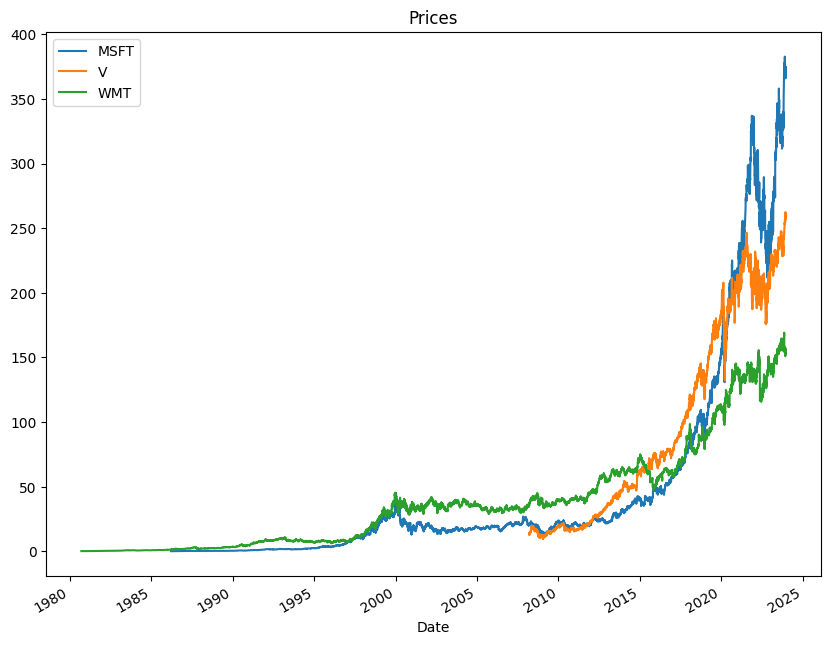

In [ ]:
plt.figure(figsize=(10,8))

microsoft['Adj Close'].plot(label='MSFT')
visa['Adj Close'].plot(label='V')
walmart['Adj Close'].plot(label='WMT')

plt.title('Prices')
plt.legend()

<Axes: ylabel='Frequency'>

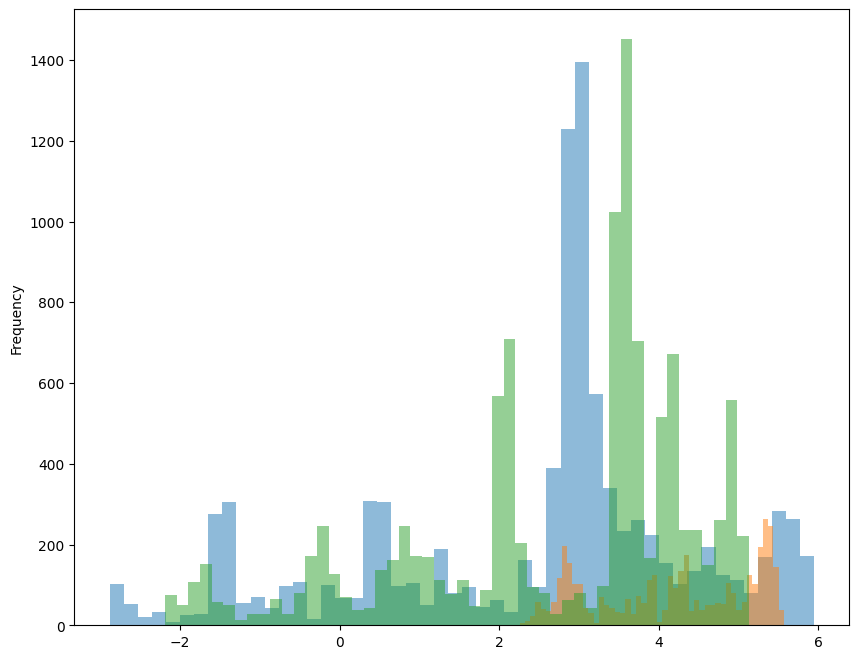

In [ ]:
plt.figure(figsize=(10,8))

np.log(microsoft['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)
np.log(visa['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)
np.log(walmart['Adj Close']).plot(kind='hist', bins=50, alpha=0.5)

# Portfolios
<br>
<font size="+1">
    <ul>
        <li>One of the most important and commercialized applications of nonlinear optimization is the construction of optimal portfolios of assets.</li>
        <br>
        <li>Classically, there were two primary objectives that a manager would like to optimize for when composing a portfolio:</li>
        <br>
        <ul>
            <li>maximize the expected return of the portfolio,</li>
            <br>
            <li>and minimize the risk associated with the portfoio.</li>
            <br>
        </ul>
        <li>In most practical applications, these two objectives are at odds with each other (unless there exists an arbitrage).</li>
        <br>
        <li>That is, in order to achieve a higher expected return, one needs to incur a greater risk.</li>
        <br>
        <li>Assume you are a portfolio manager assembling a portfolio of assets composed of Microsoft, Visa, and Walmart.</li>
        <br>
        <li>You have gathered reliable data, and now you need to calculate the expected return and risk of these securities.</li>
        <br>
        <li>Note, the <b>return</b> of a security can be defined as the percentage change of the security's price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}},$$ where $P_{i,t}$ is the price of security $i$ at time $t$.</li>
        <br>
        <li>Additionally, we can make a very crude estimate of the expected return of a security by taking the sample average of a time series of returns $$\mathbb{E}[r_{i,t}] \approx \frac{1}{T}\sum_{j=0}^{T-1} r_{i, t-j} \ .$$</li>
        <br>
        <li>For Yahoo! Finance, you must use the <a href="https://in.help.yahoo.com/kb/adjusted-close-sln28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.">adjusted close</a> when computing the close-to-close returns of a security.</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <font color="blue"><li style="color:blue">We need to first compute </li></font>
        <br>
        <ul style="color:blue">
            <font color="blue"><li>the close-to-close returns (be aware there are other types of returns you can create by using different time periods as well as trade versus quotes),</li>
            <br>
            <li>and then estimate the past expected return using some period of the data, let's jus say using two years of data.</li></font>
            <br>
        </ul>
        <font color="blue"><li style="color:blue">Note these are <b>daily</b> quantities.</li></font>
        <br>
    </ul>
</font>

$\square$

In [ ]:
import datetime as dt

today = dt.date.today()

two_years_ago = today - dt.timedelta(days=2*365)

In [ ]:
returns = pd.DataFrame()

In [ ]:
returns['MSFT_ret'] = (microsoft.loc[two_years_ago:today, 'Adj Close'] / microsoft.loc[two_years_ago:today, 'Adj Close'].shift()) - 1

returns['V_ret'] = (visa.loc[two_years_ago:today, 'Adj Close'] / visa.loc[two_years_ago:today, 'Adj Close'].shift()) - 1

returns['WMT_ret'] = (walmart.loc[two_years_ago:today, 'Adj Close'] / walmart.loc[two_years_ago:today, 'Adj Close'].shift()) - 1

In [ ]:
returns

,MSFT_ret,V_ret,WMT_ret
Date,,,
2021-12-27,NaN,NaN,NaN
2021-12-28,-0.003504,0.001930,0.014351
2021-12-29,0.002051,0.000550,-0.000490
2021-12-30,-0.007691,-0.001375,0.003223
2021-12-31,-0.008841,-0.005324,0.010617
...,...,...,...
2023-12-18,0.005179,0.001318,0.014600
2023-12-19,0.001637,0.006270,0.003614
2023-12-20,-0.007073,-0.011077,-0.011702


<Axes: xlabel='Date'>

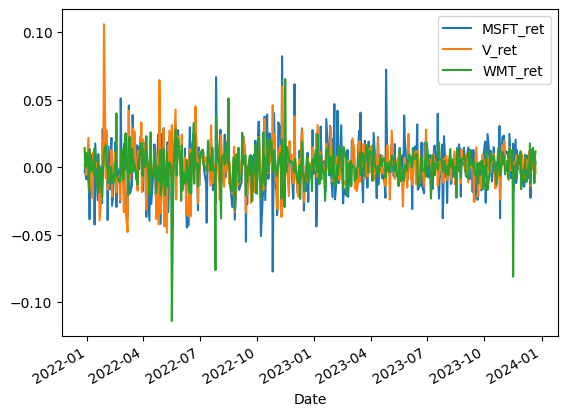

In [ ]:
returns.plot()

<Axes: ylabel='Frequency'>

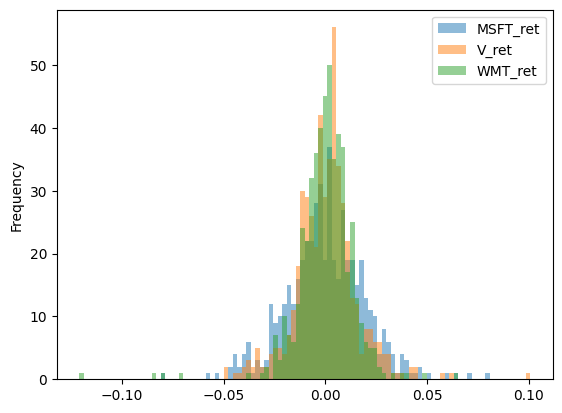

In [ ]:
np.log(returns+1).plot(kind='hist', bins=100, alpha=0.5)

In [ ]:
mean_variance = pd.DataFrame({'Mean': returns.mean(),
                              'Volatility': returns.std()})

mean_variance

,Mean,Volatility
MSFT_ret,0.000402,0.019345
V_ret,0.000492,0.015435
WMT_ret,0.000372,0.013801


In [ ]:
corr_matrix = returns.corr()

corr_matrix

,MSFT_ret,V_ret,WMT_ret
MSFT_ret,1.000000,0.568112,0.258598
V_ret,0.568112,1.000000,0.220423
WMT_ret,0.258598,0.220423,1.000000


In [ ]:
covariance_matrix = returns.cov()

covariance_matrix

,MSFT_ret,V_ret,WMT_ret
MSFT_ret,0.000374,0.000170,0.000069
V_ret,0.000170,0.000238,0.000047
WMT_ret,0.000069,0.000047,0.000190


In [ ]:
mean_variance_correlations = pd.concat([mean_variance, corr_matrix], axis=1)

mean_variance_correlations

,Mean,Volatility,MSFT_ret,V_ret,WMT_ret
MSFT_ret,0.000402,0.019345,1.000000,0.568112,0.258598
V_ret,0.000492,0.015435,0.568112,1.000000,0.220423
WMT_ret,0.000372,0.013801,0.258598,0.220423,1.000000


<br>
<font size="+1">
    <ul>
        <li>The see the expected return and variance of the three securities for a single day, as well as the cross-correlations between the securities.</li>
        <br>
        <font color="red"><li style="color:red">Recall, the correlation between two variables $(X_i, X_j)$ is defined as $$\rho_{X_i, X_j} = \frac{Cov(X_i, X_j)}{\sqrt{Var(X_i)} \ \sqrt{Var(X_j)}} \ , $$ and measures the extent to which the two variables <b>linearly</b> move together.</li></font>
        <br>
        <li>This is far from what you would use in practice, and there are so many ways to innovate on obtaining these estimates using analytics techniques, both old and new.</li>
        <br>
        <li>How might this change if we used different horizons?</li>
        <br>
        <li>How can you think of these estimates (pros and cons) and how they're going to be used from the different perspectives of</li>
        <br>
        <ul>
            <li>descriptive analytics,</li>
            <br>
            <li>predictive analytics,</li>
            <br>
            <li>prescriptive analytics,</li>
            <br>
            <li>and business development and strategy, as well as product management?</li>
            <br>
        </ul>
    </ul>
</font>

$\square$

## Concrete Formulation
<br>
<font size="+1">
    <ul>
        <li>You would like to determine what fraction (weights) of your assets-under-management dollars to invest in each of the given firms above.</li>
        <br>
        <li>If you didn't have optimization and modeling skills, what would you do?</li>
        <br>
        <ul>
            <li>Are there heuristics?</li>
            <br>
            <li>Are there pros or cons to an over or under optimized system?</li>
            <br>
            <li>What should you expect to get?</li>
            <br>
            <li>How do you think about communicating your decisions to clients?</li>
            <br>
            <li>How can this help with scaling?</li>
            <br>
            <li>etc.?</li>
            <br>
        </ul>
    </ul>
</font>

In [ ]:
mean_variance_correlations

,Mean,Volatility,MSFT_ret,V_ret,WMT_ret
MSFT_ret,0.000402,0.019345,1.000000,0.568112,0.258598
V_ret,0.000492,0.015435,0.568112,1.000000,0.220423
WMT_ret,0.000372,0.013801,0.258598,0.220423,1.000000


### Decision Variables
<br>
<font size="+1">
    <ul>
        <li>What are the problem's decision variables?</li>
        <br>
        <li>\begin{align}
        w_1 & = \text{ fraction invested in security 1} \\
        w_2 & = \text{ fraction invested in security 2} \\
        w_3 & = \text{ fraction invested in security 3} \\
        \end{align}</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
portfolio_weights = cp.Variable(len(mean_variance_correlations))

weight_msft = portfolio_weights[0]

weight_v = portfolio_weights[1]

weight_wmt = portfolio_weights[2]

### Objective
<br>
<font size="+1">
    <ul>
        <li>Assume, due to the nature of our client's request, we seek to find an allocation combination that achieves a prescribed expected daily rate of return of $0.03\% = 0.0003$, that is, $3$ basis point per day (corresponds to about $8\%$ per year), while minimizing risk.</li>
        <br>
        <li>Assume risk is measured as the standard deviation of a portfolio.</li>
        <br>
        <li>First, we have to calculate the return of a portfolio as function of its constituent securities and their weights, which is $$r_p = w_1 r_1 + w_2 r_2 + w_3 r_3 .$$</li>
        <br>
        <li>Next, we must calculate the expected return of a portfolio, which is $$\mathbb{E}[r_p] = w_1 \mathbb{E}[r_1] + w_2 \mathbb{E}[r_2] + w_3 \mathbb{E}[r_3].$$</li>
        <br>
        <li>Finally, we need to calculate the standard deviation of the return of a portfolio, which is, $$\sigma(r_p) = \sqrt{Var(r_p)} = \cdots = \\ \left[ w_1^2 \sigma^2(r_1) + w_2^2 \sigma^2(r_2)  + w_3^2 \sigma^2(r_3) + \\ 2 w_1 w_2 \sigma(r_1) \sigma(r_2) \rho_{r_1, r_2} + 2 w_1 w_3 \sigma(r_1) \sigma(r_3) \rho_{r_1, r_3} + 2 w_2 w_3 \sigma(r_2) \sigma(r_3) \rho_{r_2, r_3} \right]^{\frac{1}{2}} \\ =: risk(w_1, w_2, w_3).$$</li>
        <br>
        <font color="red"><li style="color:red">The objective function $risk(w_1, w_2, w_3)$ depends on the decision variables $(w_1, w_2, w_3)$ in a nonlinear way since it involves $w_i^2$ and $w_i w_j$. In other words, it is a nonlinear objective function in the decision variables.</li></font>
        <br>
        <li>This leads to the following objective.</li>
        <br>
        <li>\begin{align}
        \text{minimize: } & risk(w_1, w_2, w_3) \\
        \end{align}</li>
        <br>
        <li>Equivalently, \begin{align}
        \text{minimize: } & [ w_1^2 \sigma^2(r_1) + w_2^2 \sigma^2(r_2)  + w_3^2 \sigma^2(r_3) \\
        &+ 2 w_1 w_2 \sigma(r_1) \sigma(r_2) \rho_{r_1, r_2} \\
        &+ 2 w_1 w_3 \sigma(r_1) \sigma(r_3) \rho_{r_1, r_3} \\
        &+ 2 w_2 w_3 \sigma(r_2) \sigma(r_3) \rho_{r_2, r_3} ]^{\frac{1}{2}} \\
        \end{align}</li>
        <br>
        <li>The desire to hit a rate of return of at least $3$ basis points is a <b>constraint</b>, which will be discussed next.</li>
        <br>
        <li>Because there are many quantities that are being held fixed and depend on the data, it is the perfect spot to use <a href="https://www.cvxpy.org/tutorial/intro/index.html#parameters">CVXPY's parameters object</a> for the firms' </li>
        <br>
        <ul>
            <li>expected return $\mathbb{E}[r_p]$,</li>
            <br>
            <li>variance $\sigma^2(r_i)$,</li>
            <br>
            <li>standard deviations $\sigma(r_i)$, also known as volatility,</li>
            <br>
            <li>and cross-correlations $\rho_{r_i, r_j}$.</li>
            <br>
        </ul>
        <br>
    </ul>
</font>

$\square$

In [ ]:
mean_variance_correlations

,Mean,Volatility,MSFT_ret,V_ret,WMT_ret
MSFT_ret,0.000402,0.019345,1.000000,0.568112,0.258598
V_ret,0.000492,0.015435,0.568112,1.000000,0.220423
WMT_ret,0.000372,0.013801,0.258598,0.220423,1.000000


In [ ]:
# Define parameters for mean return

# Average return of Microsoft
avg_ret_microsoft = cp.Parameter()
avg_ret_microsoft.value = mean_variance_correlations.loc['MSFT_ret', 'Mean']

# Average return of Visa
avg_ret_visa = cp.Parameter()
avg_ret_visa.value = mean_variance_correlations.loc['V_ret', 'Mean']

# Average return of Walmart
avg_ret_walmart = cp.Parameter()
avg_ret_walmart.value = mean_variance_correlations.loc['WMT_ret', 'Mean']

In [ ]:
# Define parameters for volatility and variance

# Volatility and Variance of Microsoft
vol_microsoft = cp.Parameter()
variance_microsoft = cp.Parameter()

vol_microsoft.value = mean_variance_correlations.loc['MSFT_ret', 'Volatility']
variance_microsoft.value = vol_microsoft.value**2

# Volatility and Variance of Visa
vol_visa = cp.Parameter()
variance_visa = cp.Parameter()

vol_visa.value = mean_variance_correlations.loc['V_ret', 'Volatility']
variance_visa.value = vol_visa.value**2

# Volatility and Variance of Walmart
vol_walmart = cp.Parameter()
variance_walmart = cp.Parameter()

vol_walmart.value = mean_variance_correlations.loc['WMT_ret', 'Volatility']
variance_walmart.value = vol_walmart.value**2

In [ ]:
# Define parameters for cross-correlations

# Correlation between MSFT and V
corr_msft_v = cp.Variable()
corr_msft_v.value = mean_variance_correlations.loc['MSFT_ret', 'V_ret']

# Correlation between MSFT and WMT
corr_msft_wmt = cp.Variable()
corr_msft_wmt.value = mean_variance_correlations.loc['MSFT_ret', 'WMT_ret']

# Correlation between MSFT and V
corr_v_wmt = cp.Variable()
corr_v_wmt.value = mean_variance_correlations.loc['V_ret', 'WMT_ret']

In [ ]:
expected_risk = (((weight_msft**2 * variance_microsoft) \
                 +(weight_v**2 * variance_visa) \
                 +(weight_wmt**2 * variance_walmart)) \
                 + ((weight_msft*weight_v*vol_microsoft*vol_visa*corr_msft_v)\
                 +(weight_msft*weight_wmt*vol_microsoft*vol_walmart*corr_msft_wmt)\
                 +(weight_v*weight_wmt*vol_visa*vol_walmart*corr_v_wmt)))**(1/2)

In [ ]:
objective = cp.Minimize(expected_risk)

### Constraints
<br>
<font size="+1">
    <ul>
        <li>Your client tells you they want their portfolio to achieve a return of $3$ basis points per day, at least.</li>
        <br>
        <ul>
            <li>However, they want to see the risk-return tradeoff if they varied their desired return. In other words, what is the effect of modifying the required rate of return?</li>
            <br>
        </ul>
        <li>Additionally, they think they only want to buy stocks and not short-sell stocks, but they want to see the differences between a long-only portfolio and a portfolio with no short-selling constraints.</li>
        <br>
        <li>They also don't want to buy on any security on margin.</li>
        <br>
        <li>The client requires the manager to be fully invested because they feel they shouldn't pay management fees to not have the manager take risk, so the weights need to sum to exactly one.</li>
        <br>
        <li>The client also wants their portfolio to have at least $33\%$ exposure to Microsoft since they feel they will be very successful with <a href="https://azure.microsoft.com/en-us/">cloud computing and their Azure products</a>.</li>
        <br>
        <li>Specifically, </li>
        <br>
        <li>\begin{align}
        \text{subject to: }
        & \mathbb{E}[r_p] = w_1 \mathbb{E}[r_1] + w_2 \mathbb{E}[r_2] + w_3 \mathbb{E}[r_3] & \geq 0.0003 & \text{ (required return)}\\
        & w_1, w_2, w_3  & \geq 0  & \text{ (no short-selling)}\\
        & w_1, w_2, w_3  & \leq 1 & \text{ (no margin/leverage)}\\
        & w_1 + w_2 + w_3  &  = 1 & \text{ (fully invested)}\\
        &  w_1 & \geq 0.33  & \text{ (required exposure to MSFT)}\\
        \end{align}</li>
        <br>
    </ul>
</font>

$\square$

In [ ]:
req_return = cp.Parameter()
req_return.value = 0.0003

constraint_required_return = [(weight_msft*avg_ret_microsoft \
                              + weight_v*avg_ret_visa \
                              + weight_wmt*avg_ret_walmart >= req_return)]

constraint_no_short_selling = [weight_msft >= 0,
                              weight_v >= 0,
                              weight_wmt >= 0]

constraint_no_leverage = [weight_msft <= 1,
                          weight_v <= 1,
                          weight_wmt <= 1]

constraint_fully_vested = [weight_msft + weight_v + weight_wmt == 1]

req_msft_exposure = cp.Parameter()
req_msft_exposure.value = 0.33

constraint_required_msft_exposure = [weight_msft >= req_msft_exposure]

constraints = constraint_required_return + \
            constraint_no_short_selling + \
            constraint_no_leverage + \
            constraint_fully_vested + \
            constraint_required_msft_exposure

In [ ]:
prob = cp.Problem(objective, constraints)

In [ ]:
print(prob)

minimize power(power(var1[0], 2.0) @ param9 + power(var1[1], 2.0) @ param11 + power(var1[2], 2.0) @ param13 + var1[0] @ var1[1] @ param8 @ param10 @ var14 + var1[0] @ var1[2] @ param8 @ param12 @ var15 + var1[1] @ var1[2] @ param10 @ param12 @ var16, 0.5)
subject to param41 <= var1[0] @ param5 + var1[1] @ param6 + var1[2] @ param7
           0.0 <= var1[0]
           0.0 <= var1[1]
           0.0 <= var1[2]
           var1[0] <= 1.0
           var1[1] <= 1.0
           var1[2] <= 1.0
           var1[0] + var1[1] + var1[2] == 1.0
           param81 <= var1[0]


$\rule{800pt}{20pt}$

### Solution
<br>
<font size="+1">
    <ul>
        <li>What is the solution to the problem?</li>
        <br>
        <li>How can you interpret the solution?</li>
        <br>
    </ul>
</font>

In [ ]:
prob.solve()

DCPError: ignored

In [ ]:
prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 25 06:03:14 PM: Your problem has 6 variables, 9 constraints, and 11 parameters.
(CVXPY) Dec 25 06:03:14 PM: It is compliant with the following grammars: 
(CVXPY) Dec 25 06:03:14 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.


DCPError: ignored

In [ ]:
assert prob.is_dcp()

AssertionError: ignored

In [ ]:
expected_risk.is_dcp()

False

In [ ]:
weight_msft.curvature

'AFFINE'

In [ ]:
weight_v.curvature

'AFFINE'

In [ ]:
(vol_microsoft*vol_visa).curvature

'CONSTANT'

In [ ]:
cp.multiply(weight_msft, weight_v).curvature

'UNKNOWN'

In [ ]:
cp.multiply(weight_msft, weight_v).is_dcp()

False

In [ ]:
(weight_msft*weight_v).curvature

'UNKNOWN'

In [ ]:
(((weight_msft**2 ) +(weight_v**2) +(weight_wmt**2) + ((weight_msft*weight_v)))).is_dcp()

False

### Error?!
<br>
<font size="+1">
    <ul>
        <li>What happened?</li>
        <br>
        <ul>
            <li><b>Disciplined convex programming (DCP)</b> is a system for constructing mathematical expressions with known curvature from a given library of base functions.</li>
        <br>
        <li>CVXPY uses DCP to ensure that the specified optimization problems are convex.</li>
        <br>
        </ul>
        <li>What do we do?</li>
        <br>
        <li>We must reformulate using matrices!</li>
        <br>
        <li>First, we have to calculate the return of a portfolio as function of its constituent securities and their weights, which is $$r_p = w_1 r_1 + w_2 r_2 + w_3 r_3 .$$</li>
        <br>
        <li>Next, we must calculate the expected return of a portfolio, which is $$\mathbb{E}[r_p] = w_1 \mathbb{E}[r_1] + w_2 \mathbb{E}[r_2] + w_3 \mathbb{E}[r_3].$$</li>
        <br>
        <li>Finally, we need to calculate the standard deviation of the return of a portfolio, which is, $$\sigma(r_p) = \sqrt{Var(r_p)} = \cdots = \\ \left[ w_1^2 \sigma^2(r_1) + w_2^2 \sigma^2(r_2)  + w_3^2 \sigma^2(r_3) + \\ 2 w_1 w_2 \sigma(r_1) \sigma(r_2) \rho_{r_1, r_2} + 2 w_1 w_3 \sigma(r_1) \sigma(r_3) \rho_{r_1, r_3} + 2 w_2 w_3 \sigma(r_2) \sigma(r_3) \rho_{r_2, r_3} \right]^{\frac{1}{2}} \\ =: risk(w_1, w_2, w_3).$$</li>
        <br>
        <font color="red"><li style="color:red">The objective function $risk(w_1, w_2, w_3)$ depends on the decision variables $(w_1, w_2, w_3)$ in a nonlinear way since it involves $w_i^2$ and $w_i w_j$. In other words, it is a nonlinear objective function in the decision variables.</li></font>
        <br>
        <li>This leads to the following objective.</li>
        <br>
        <li>\begin{align}
        \text{minimize: } & risk(w_1, w_2, w_3) \\
        \end{align}</li>
        <br>
        <li>Equivalently, \begin{align}
        \text{minimize: } & [ w_1^2 \sigma^2(r_1) + w_2^2 \sigma^2(r_2)  + w_3^2 \sigma^2(r_3) \\
        &+ 2 w_1 w_2 \sigma(r_1) \sigma(r_2) \rho_{r_1, r_2} \\
        &+ 2 w_1 w_3 \sigma(r_1) \sigma(r_3) \rho_{r_1, r_3} \\
        &+ 2 w_2 w_3 \sigma(r_2) \sigma(r_3) \rho_{r_2, r_3} ]^{\frac{1}{2}} \\
        \end{align}</li>
        <br>
        <li>Note, by definition of correlation we have $$Cov(r_i, r_j) = \rho_{r_i, r_j} \sigma(r_i) \sigma(r_j).$$</li>
        <br>
        <font color="blue"><li style="color:blue">I am not going to attempt to teach <a href="https://web.stanford.edu/class/ee364a/lectures/num-lin-alg.pdf"><b>Linear Algebra</b></a>, but what I will say is that whenever you have a lot of things being added together and the things are products of other stuff, usually involving indices, then there is generally a way to write it using matrices and vectors. Once in this form, it becomes very compatible with all sorts of solvers and modeling languages.</li>
        <br>
        <li style="color:blue">\begin{equation}risk(w_1, w_2, w_3)^2 =
        \underbrace{\begin{bmatrix}
        w_1 & w_2 & w_3 \\
        \end{bmatrix}}_{\underbrace{\bar{w}^T}_{(1\times 3)}}
        \underbrace{\begin{bmatrix}
Cov(r_1,r_1) & Cov(r_1, r_2) & Cov(r_1, r_3)\\
Cov(r_2, r_1) & Cov(r_2, r_2) & Cov(r_2, r_3) \\
Cov(r_3, r_1) & Cov(r_3, r_2) & Cov(r_3, r_3) \\
            \end{bmatrix}}_{\underbrace{\Sigma}_{(3\times 3)}}
            \underbrace{\begin{bmatrix}
        w_1 \\ w_2 \\ w_3 \\
        \end{bmatrix}}_{\underbrace{\bar{w}}_{(3\times 1)}}\end{equation}</li>
        <br>
        <li style="color:blue">There are various ad-hoc resources to look at if you want to learn more, including <a href="https://machinelearningmastery.com/gentle-introduction-linear-algebra/">A Gentle Introduction to Linear Algebra</a>, as well as <a href="https://www.khanacademy.org/math/linear-algebra">Khan Academy</a> (very good).</li></font>
        <br>
    </ul>
</font>

$\square$

In [ ]:
covariance_matrix = returns.cov()

covariance_matrix

,MSFT_ret,V_ret,WMT_ret
MSFT_ret,0.000374,0.000170,0.000069
V_ret,0.000170,0.000238,0.000047
WMT_ret,0.000069,0.000047,0.000190


In [ ]:
objective = cp.Minimize(cp.quad_form(portfolio_weights, covariance_matrix))

In [ ]:
objective.is_dcp()

True

In [ ]:
prob = cp.Problem(objective, constraints)

In [ ]:
prob.solve()

0.00014494459293220712

In [ ]:
prob.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 25 06:03:54 PM: Your problem has 3 variables, 9 constraints, and 5 parameters.
(CVXPY) Dec 25 06:03:54 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 25 06:03:54 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 25 06:03:54 PM: Using cached ASA map, for faster compilation (bypassing reduction chain).
(CVXPY) Dec 25 06:03:54 PM: Finished problem compilation (took 8.351e-03 seconds).
-------------------------------------------------------------------------------
                                

0.00014494459293220717

In [ ]:
portfolio_weights.value

array([0.33      , 0.18805365, 0.48194635])

In [ ]:
weight_msft.value, weight_v.value, weight_wmt.value

(0.33000000000000046, 0.1622762396133765, 0.5077237603866241)

In [ ]:
try:
    prob.solve()
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(mean_variance_correlations)):
        print (" Investment in {} : {}% of the portfolio".format(mean_variance_correlations.index[s],
                                                                 round(100*portfolio_weights.value[s],2)))
    print ("----------------------")
    print ("Exp ret = {}%".format(round(100*((portfolio_weights.value.T)@(mean_variance_correlations['Mean'])),2)))
    print ("Expected risk    = {}%".format(round(100*((cp.quad_form(portfolio_weights.value, covariance_matrix).value)**(1/2)),2)))
except:
    print ("Error")

Optimal portfolio
----------------------
 Investment in MSFT_ret : 33.0% of the portfolio
 Investment in V_ret : 18.81% of the portfolio
 Investment in WMT_ret : 48.19% of the portfolio
----------------------
Exp ret = 0.04%
Expected risk    = 1.2%


$\rule{800pt}{10pt}$

## Abstract Formulation
<br>
<font size="+1">
    <ul>
        <li>We can define a security's price for investment $i$ at time $t$ as $P_i(t) = P_{i,t}$.</li>
        <br>
        <li>We can define a return as the relative price change, or growth rate, of the share price $$r_{i,t} = \frac{P_{i,t} - P_{i,t-1}}{P_{i,t-1}}$$</li>
        <br>
        <li>Fix a point in time $t$, and drop the time subscript from the returns.</li>
        <br>
        <li>We can define a portfolio as a linear combination of individual securities' returns $$r_p = w_1 r_1 + w_2 r_2 + \cdots w_n r_n, $$ where $n$ is the total number of securities in your investable universe and $w_i$ is the percentage of your capital that you want to invest in the $i^{th}$ security.</li>
        <br>
        <font color="blue"><li style="color:blue">The expected rate of return of the portfolio is given by $$reward(\bar{w}) = \mathbb{E}[r_p] = \sum_{i=1}^n w_1 \mathbb{E}[r_i] = \bar{w}^T \bar{\mu},$$ where $\bar{w}$ is the vector of weights and $\bar{\mu}$ is vector of expected returns.</li></font>
        <br>
        <li>We can define variance as a measure of the average deviation from the average and is one measure to quantify <i>risk</i>, specifically the variance of a portfolio's return is $$Var(r_p) = \sum_{i=1}^n \sum_{j=1}^n w_i w_j Cov(r_i, r_j)$$ $$\Updownarrow$$ $$Var(r_p) = \sum_{i=1}^n w_i^2 Var(r_i) + 2 \sum_{i,j=1; \ i\neq j}^n w_i w_j Cov(r_i, r_j)$$ $$\Updownarrow$$ $$Var(r_p) = \bar{w}^T \Sigma \bar{w},$$ where $\bar{w}$ is the vector of weights and $\Sigma$ is the matrix of covariances of returns.</li>
        <br>
        <font color="blue"><li style="color:blue">\begin{equation}risk(\bar{w})^2 = Var(r_p) =
        \underbrace{\begin{bmatrix}
        w_1 & w_2 & \cdots & w_n \\
        \end{bmatrix}}_{\underbrace{\bar{w}^T}_{(1\times n)}}
        \underbrace{\begin{bmatrix}
Cov(r_1,r_1) & Cov(r_1, r_2) & \cdots & Cov(r_1, r_n)\\
\vdots & \vdots & \cdots & \vdots \\
Cov(r_n, r_1) & Cov(r_n, r_2) & \vdots & Cov(r_n, r_n) \\
            \end{bmatrix}}_{\underbrace{\Sigma}_{(n\times n)}}
            \underbrace{\begin{bmatrix}
        w_1 \\ w_2 \\ \vdots \\ w_n \\
        \end{bmatrix}}_{\underbrace{\bar{w}}_{(n\times 1)}}\end{equation}</li>
        <br>
        $\rule{800pt}{10pt}$
        <br>
        <li>This abstract formulation of the above problem leads to the following:</li>
        <br>
        <li>\begin{align}
        \text{minimize: } & risk(\bar{w}) = & (\bar{w}^T \Sigma \bar{w})^{\frac{1}{2}} \\
        \text{subject to: } & reward(\bar{w}) = & \bar{w}^T \bar{\mu} \geq C_1 & \text{ (required return)}\\
        & \bar{w}  & \geq \bar{0}  & \text{ (no short-selling)}\\
        & \bar{w}  & \leq \bar{1} & \text{ (no margin/leverage)}\\
        & \bar{w}^T \bar{1}  &  = 1 & \text{ (fully invested)}\\
        &  w_j & \geq C_2  & \text{ (required exposure to security j)}\\
        \end{align}</li>
        <br>
        <li>Note the last condition can be represented in matrix form as well: \begin{equation} \begin{bmatrix}w_1 & \cdots & w_{j-1} & w_{j} & w_{j+1} & \cdots & w_n \end{bmatrix} \begin{bmatrix}0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} = w_j \end{equation}</li>
        <br>
    </ul>
</font>

$\square$

$\rule{800pt}{20pt}$

<br>
<font size="+1">
    <ul>
        <li>Many firms who feel they are able to <i>solve</i> the standard problem efficiently for their clients are looking for ways to improve their product and, hopefully, expand the potential client base. </li>
        <br>
        <li>A few areas for innovation on this problem include:</li>
        <br>
        <ul>
            <li>thousands of securities, all of different types,</li>
            <br>
            <li>innovative forecasting methods for expected returns and risks,</li>
            <br>
            <li>inclusion of a good transaction cost model into the optimization framework - this is a huge problem,</li>
            <br>
            <li>customized constraints that are at the individual security level, at the <i>style</i> level, at the factor level, at the sector level, etc.,</li>
            <br>
            <li>incorporation of time dynamics on constraints and forecasts,</li>
            <br>
            <li>relying less on formal models, and using machine learning predictions to help inform us about what the correct objective should be, this is loosely known as reinforcement learning,</li>
            <br>
            <li>etc.</li>
            <br>
        </ul>
    </ul>
</font>

### Portfolio optimization

#### Portfolio allocation vector

In this example we show how to do portfolio optimization using CVXPY.
We begin with the basic definitions.
In portfolio optimization we have some amount of money to invest in any of $n$ different assets.
We choose what fraction $w_i$ of our money to invest in each asset $i$, $i=1, \ldots, n$.

We call $w\in {\bf R}^n$ the *portfolio allocation vector*.
We of course have the constraint that ${\mathbf 1}^T w =1$.
The allocation $w_i<0$ means a *short position* in asset $i$, or that we borrow shares to sell now that we must replace later.
The allocation $w \geq 0$ is a *long only* portfolio.
The quantity
$$ \|w \|_1 = {\mathbf 1}^T w_+ + {\mathbf 1}^T w_- $$
is known as *leverage*.

$\square$

#### Asset returns

We will only model investments held for one period. The initial prices are $p_i > 0$. The end of period prices are $p_i^+ >0$. The asset (fractional) returns are $r_i = (p_i^+-p_i)/p_i$. The porfolio (fractional) return is $R = r^Tw$.

A common model is that $r$ is a random variable with mean ${\bf E}r = \mu$ and covariance ${\bf E{(r-\mu)(r-\mu)^T}} = \Sigma$.
It follows that $R$ is a random variable with ${\bf E}R = \mu^T w$ and ${\bf var}(R) = w^T\Sigma w$.
${\bf E}R$ is the (mean) *return* of the portfolio. ${\bf var}(R)$ is the *risk* of the portfolio.
(Risk is also sometimes given as ${\bf std}(R) = \sqrt{{\bf var}(R)}$.)

Portfolio optimization has two competing objectives: high return and low risk.

#### Classical (Markowitz) portfolio optimization

Classical (Markowitz) portfolio optimization solves the optimization problem

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma w^T\Sigma w\\
\mbox{subject to} & {\bf 1}^T w = 1, \quad w \in {\cal W},
\end{array}

where $w \in {\bf R}^n$ is the optimization variable, $\cal W$ is a set of allowed portfolios (e.g., ${\cal W} = {\bf R}_+^n$ for a long only portfolio), and $\gamma >0$ is the *risk aversion parameter*.

The objective $\mu^Tw - \gamma w^T\Sigma w$ is the *risk-adjusted return*. Varying $\gamma$ gives the optimal *risk-return trade-off*.
We can get the same risk-return trade-off by fixing return and minimizing risk.

#### Example 1

In the following code we compute and plot the optimal risk-return trade-off for $10$ assets, restricting ourselves to a long only portfolio.

In [ ]:
# Generate data for long only portfolio optimization.
import numpy as np
import scipy.sparse as sp

np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)

In [ ]:
# Long only portfolio optimization.
import cvxpy as cp


w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T @ w
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1, w >= 0])

In [ ]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

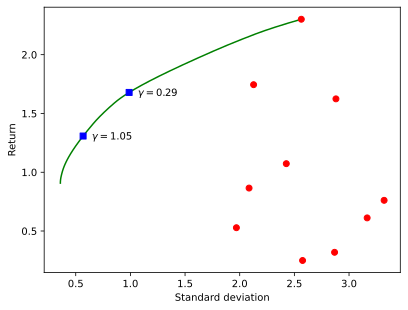

In [ ]:
# Plot long only trade-off curve.
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, "g-")
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], "bs")
    ax.annotate(
        r"$\gamma = %.2f$" % gamma_vals[marker],
        xy=(risk_data[marker] + 0.08, ret_data[marker] - 0.03),
    )
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i, i]).value, mu[i], "ro")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.show()

We plot below the return distributions for the two risk aversion values marked on the trade-off curve.
Notice that the probability of a loss is near 0 for the low risk value and far above 0 for the high risk value.

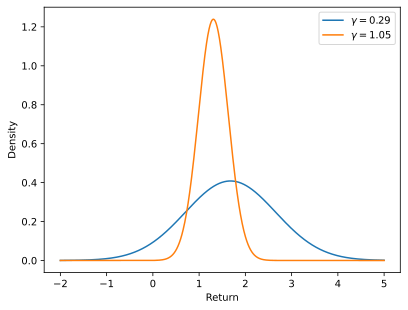

In [ ]:
# Plot return distributions for two points on the trade-off curve.
import scipy.stats as spstats


plt.figure()
for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    plt.plot(
        x,
        spstats.norm.pdf(x, ret.value, risk.value),
        label=r"$\gamma = %.2f$" % gamma.value,
    )

plt.xlabel("Return")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.show()

#### Portfolio constraints

There are many other possible portfolio constraints besides the long only constraint. With no constraint (${\cal W} = {\bf R}^n$), the optimization problem has a simple analytical solution. We will look in detail at a *leverage limit*, or the constraint that $\|w \|_1 \leq L^\mathrm{max}$.


Another interesting constraint is the *market neutral* constraint $m^T \Sigma w =0$, where $m_i$ is the capitalization of asset $i$.
$M = m^Tr$ is the *market return*, and $m^T \Sigma w = {\bf cov}(M,R)$.
The market neutral constraint ensures that the portfolio return is uncorrelated with the market return.

#### Example 2

In the following code we compute and plot optimal risk-return trade-off curves for leverage limits of 1, 2, and 4.
Notice that more leverage increases returns and allows greater risk.

In [ ]:
# Portfolio optimization with leverage limit.
Lmax = cp.Parameter()
prob = cp.Problem(
    cp.Maximize(ret - gamma * risk), [cp.sum(w) == 1, cp.norm(w, 1) <= Lmax]
)

In [ ]:
# Compute trade-off curve for each leverage limit.
L_vals = [1, 2, 4]
SAMPLES = 100
risk_data = np.zeros((len(L_vals), SAMPLES))
ret_data = np.zeros((len(L_vals), SAMPLES))
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
w_vals = []
for k, L_val in enumerate(L_vals):
    for i in range(SAMPLES):
        Lmax.value = L_val
        gamma.value = gamma_vals[i]
        prob.solve(solver=cp.SCS)
        risk_data[k, i] = cp.sqrt(risk).value
        ret_data[k, i] = ret.value

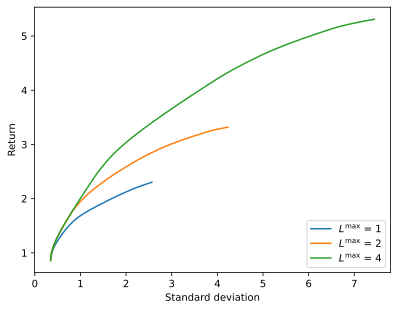

In [ ]:
# Plot trade-off curves for each leverage limit.
for idx, L_val in enumerate(L_vals):
    plt.plot(risk_data[idx, :], ret_data[idx, :], label=r"$L^{\max}$ = %d" % L_val)
for w_val in w_vals:
    w.value = w_val
    plt.plot(cp.sqrt(risk).value, ret.value, "bs")
plt.xlabel("Standard deviation")
plt.ylabel("Return")
plt.legend(loc="lower right")
plt.show()

We next examine the points on each trade-off curve where $w^T\Sigma w = 2$.
We plot the amount of each asset held in each portfolio as bar graphs. (Negative holdings indicate a short position.)
Notice that some assets are held in a long position for the low leverage portfolio but in a short position in the higher leverage portfolios.

In [ ]:
# Portfolio optimization with a leverage limit and a bound on risk.
prob = cp.Problem(cp.Maximize(ret), [cp.sum(w) == 1, cp.norm(w, 1) <= Lmax, risk <= 2])

In [ ]:
# Compute solution for different leverage limits.
for k, L_val in enumerate(L_vals):
    Lmax.value = L_val
    prob.solve()
    w_vals.append(w.value)

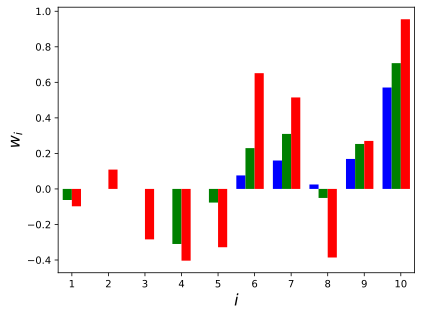

In [ ]:
# Plot bar graph of holdings for different leverage limits.
colors = ["b", "g", "r"]
indices = np.argsort(mu.flatten())
for idx, L_val in enumerate(L_vals):
    plt.bar(
        np.arange(1, n + 1) + 0.25 * idx - 0.375,
        w_vals[idx][indices],
        color=colors[idx],
        label=r"$L^{\max}$ = %d" % L_val,
        width=0.25,
    )
plt.ylabel(r"$w_i$", fontsize=16)
plt.xlabel(r"$i$", fontsize=16)
plt.xlim([1 - 0.375, 10 + 0.375])
plt.xticks(np.arange(1, n + 1))
plt.show()

#### Variations

There are many more variations of classical portfolio optimization. We might require that $\mu^T w \geq R^\mathrm{min}$ and minimize $w^T \Sigma w$ or $\|\Sigma ^{1/2} w\|_2$.
We could include the (broker) cost of short positions as the penalty $s^T (w)_-$ for some $s \geq 0$.
We could include transaction costs (from a previous portfolio $w^\mathrm{prev}$) as the penalty

$$
\kappa ^T |w-w^\mathrm{prev}|^\eta, \quad
\kappa \geq 0.
$$


Common values of $\eta$ are $\eta =1, ~ 3/2, ~2$.


#### Factor covariance model

A particularly common and useful variation is to model the covariance matrix $\Sigma$ as a factor model

$$
\Sigma  =  F \tilde \Sigma F^T + D,
$$

where  $F \in {\bf R}^{n \times k}$, $k \ll n$ is the *factor loading matrix*. $k$ is the number of factors (or sectors) (typically 10s). $F_{ij}$ is the loading of asset $i$ to factor $j$.
$D$ is a diagonal matrix; $D_{ii}>0$ is the *idiosyncratic risk*. $\tilde \Sigma > 0$ is the *factor covariance matrix*.

$F^Tw \in {\bf R}^k$ gives the portfolio *factor exposures*. A portfolio is *factor $j$ neutral* if $(F^Tw)_j=0$.


#### Portfolio optimization with factor covariance model

Using the factor covariance model, we frame the portfolio optimization problem as

\begin{array}{ll} \mbox{maximize} & \mu^T w - \gamma \left(f^T \tilde \Sigma f  + w^TDw \right) \\
\mbox{subject to} & {\bf 1}^T w = 1, \quad f=F^Tw\\
& w \in {\cal W}, \quad f \in {\cal F},
\end{array}

where the variables are the allocations $w \in {\bf R}^n$ and factor exposures $f\in {\bf R}^k$ and $\cal F$ gives the factor exposure constraints.

Using the factor covariance model in the optimization problem has a computational advantage. The solve time is $O(nk^2)$ versus $O(n^3)$ for the standard problem.

#### Example 3

In the following code we generate and solve a portfolio optimization problem with 50 factors and 3000 assets.
We set the leverage limit $=2$ and $\gamma=0.1$.

We solve the problem both with the covariance given as a single matrix and as a factor model.
Using CVXPY with the OSQP solver running in a single thread, the solve time was 173.30 seconds for the single matrix formulation and 0.85 seconds for the factor model formulation.
We collected the timings on a MacBook Air with an Intel Core i7 processor.

In [ ]:
# Generate data for factor model.
n = 3000
m = 50
np.random.seed(1)
mu = np.abs(np.random.randn(n, 1))
Sigma_tilde = np.random.randn(m, m)
Sigma_tilde = Sigma_tilde.T.dot(Sigma_tilde)
D = sp.diags(np.random.uniform(0, 0.9, size=n))
F = np.random.randn(n, m)

In [ ]:
# Factor model portfolio optimization.
w = cp.Variable(n)
f = cp.Variable(m)
gamma = cp.Parameter(nonneg=True)
Lmax = cp.Parameter()
ret = mu.T @ w
risk = cp.quad_form(f, Sigma_tilde) + cp.sum_squares(np.sqrt(D) @ w)
prob_factor = cp.Problem(
    cp.Maximize(ret - gamma * risk),
    [cp.sum(w) == 1, f == F.T @ w, cp.norm(w, 1) <= Lmax],
)

# Solve the factor model problem.
Lmax.value = 2
gamma.value = 0.1
prob_factor.solve(verbose=True)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Dec 25 06:06:04 PM: Your problem has 3050 variables, 3 constraints, and 2 parameters.
(CVXPY) Dec 25 06:06:04 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Dec 25 06:06:04 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Dec 25 06:06:04 PM: Compiling problem (target solver=OSQP).
(CVXPY) Dec 25 06:06:04 PM: Reduction chain: FlipObjective -> CvxAttr2Constr -> Qp2SymbolicQp -> QpMatrixStuffing -> OSQP
(CVXPY) Dec 25 06:06:04 PM: Applying reduction FlipObjective
(CVXPY) Dec 25 06:06:04 PM: Applying reduct

4.605102865930337